## GreenRoute: Carbon Footprint Optimization in Supply Chain Logistics

Step-1️⃣ Import & Load Data

In [3]:
# Import the libraries and load the data we need
import pandas as pd     # For working with data
import numpy as np      # For numerical calculation 
import seaborn as sns       # For plotting
import matplotlib.pyplot as plt       # For plotting
from sklearn.model_selection import train_test_split    # To split data into train/test
from sklearn.ensemble import RandomForestRegressor      # Our model
from sklearn.preprocessing import LabelEncoder      # To change the text into numbers
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score    # To check model accuracy
import joblib   # To save out model and encoders

# Load the local csv file (Dataset)
df = pd.read_csv('vehicle_emission_datasets2.csv')
df.head()       # Show the first rows 

,Vehicle Type,Fuel Type,Distance(Km),Cargo_Wt.,Engine Size,Age of Vehicle,Mileage,Speed,Acceleration,Road Type,...,Temperature,Humidity,Wind Speed,Air Pressure,CO2 Emissions,NOx Emissions,PM2.5 Emissions,VOC Emissions,SO2 Emissions,Emission Level
0,Motorcycle,Electric,932,1147,2.747609,22,291288,49.083255,1.887738,Highway,...,13.880458,52.883905,18.938861,955.411642,179.930088,1.085520,0.011548,0.096207,0.022936,Medium
1,Bus,Electric,675,437,5.743714,3,188398,23.460311,3.544147,City,...,19.136947,5.697343,14.716526,1035.763062,250.505219,1.285628,0.187112,0.073321,0.028021,Medium
2,Bus,Hybrid,573,1176,4.606368,17,281451,115.508351,4.646886,Highway,...,8.123428,3.953116,18.644522,976.207064,404.979103,0.258189,0.132398,0.014744,0.075334,High
3,Truck,Electric,717,1519,3.913024,4,151321,18.540217,3.581004,Rural,...,35.994893,0.509678,11.951859,966.919462,463.568608,1.040956,0.166325,0.093490,0.025324,High
4,Truck,Hybrid,362,976,1.611297,15,91810,109.596566,3.879303,Highway,...,14.793481,52.450884,2.761138,953.229351,79.514604,1.583390,0.078043,0.020396,0.024986,Low


Step- 2️⃣ Prepare features (inputs) and target (output)

In [4]:
# 'CO2 Emissions' is what we want to predict
target = 'CO2 Emissions'

# X = all columns except target, y = target column
X = df.drop(columns=[target])
y = df[target] 

Step- 3️⃣ Encode categorical (text) columns as numbers

In [5]:
# Find columns that have text data
cat_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}     # To save label encoders for each column

# Loop through each text column
for col in cat_cols:
    le = LabelEncoder()       # Create a new label encoder
    X[col] = le.fit_transform(X[col])       # Fit on column and transform
    label_encoders[col] = le        # Save the encoder for later
    
# Save all the label encoders for future use in app
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Vehicle Type        10000 non-null  object 
 1   Fuel Type           10000 non-null  object 
 2   Distance(Km)        10000 non-null  int64  
 3   Cargo_Wt.           10000 non-null  int64  
 4   Engine Size         10000 non-null  float64
 5   Age of Vehicle      10000 non-null  int64  
 6   Mileage             10000 non-null  int64  
 7   Speed               10000 non-null  float64
 8   Acceleration        10000 non-null  float64
 9   Road Type           10000 non-null  object 
 10  Traffic Conditions  10000 non-null  object 
 11  Temperature         10000 non-null  float64
 12  Humidity            10000 non-null  float64
 13  Wind Speed          10000 non-null  float64
 14  Air Pressure        10000 non-null  float64
 15  CO2 Emissions       10000 non-null  float64
 16  NOx E

Step- 4️⃣ Split the data into training and testing sets

In [7]:
# 80% training and 20% testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Step- 5️⃣ Train the Random Forest model

In [8]:
# Create a Random Forest model
model = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Teach the model using the training data
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=500,
                      n_jobs=-1, random_state=42)

We chose Random Forest because it handles the complex, nonlinear relationships between logistics features and CO₂ emissions better than simpler models like linear regression. Unlike a single decision tree, it reduces overfitting by combining many trees. It’s also faster and more stable than heavy algorithms like neural networks or SVMs and easier to scale than KNN. Overall, Random Forest offers a strong balance of accuracy, efficiency, and ease of use — making it a practical and powerful choice for this project.


Step- 6️⃣ Check the model's performance

In [9]:
# Predict on the test set 
y_pred = model.predict(X_test)

# Metrics
# Calculate Mean Absolute Error, Mean Squared Error and R2 Score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f'Mean Squared Error: {mse:.2f}')
print(f"RMSE: {rmse:.2f}")
print(f'R2 Score: {r2:.3f}')

Mean Absolute Error: 40.92
Mean Squared Error: 2382.33
RMSE: 48.81
R2 Score: 0.859


Step- 7️⃣ Save the trained model

In [10]:
# Save the training model as a file
#joblib.dump(model, 'model.pkl')
#print('Model saved as model.pkl')

In [11]:
# Save column order after training
feature_order = X_train.columns.tolist()
joblib.dump(feature_order, 'feature_order.pkl')
print('Saved feature order as feature_order.pkl')

Saved feature order as feature_order.pkl


In [12]:
# Fit model
model.fit(X_train, y_train)

# Save model
joblib.dump(model, 'model.pkl')
print('Saved model.pkl')

# Save column order
feature_order = X_train.columns.tolist()
joblib.dump(feature_order, 'feature_order.pkl')
print('Saved feature_order.pkl')


Saved model.pkl
Saved feature_order.pkl


## visualizations

In [13]:
# Set a consistent style and palette for all plots
sns.set_theme(style='whitegrid', palette='pastel')

Correlation Heatmap

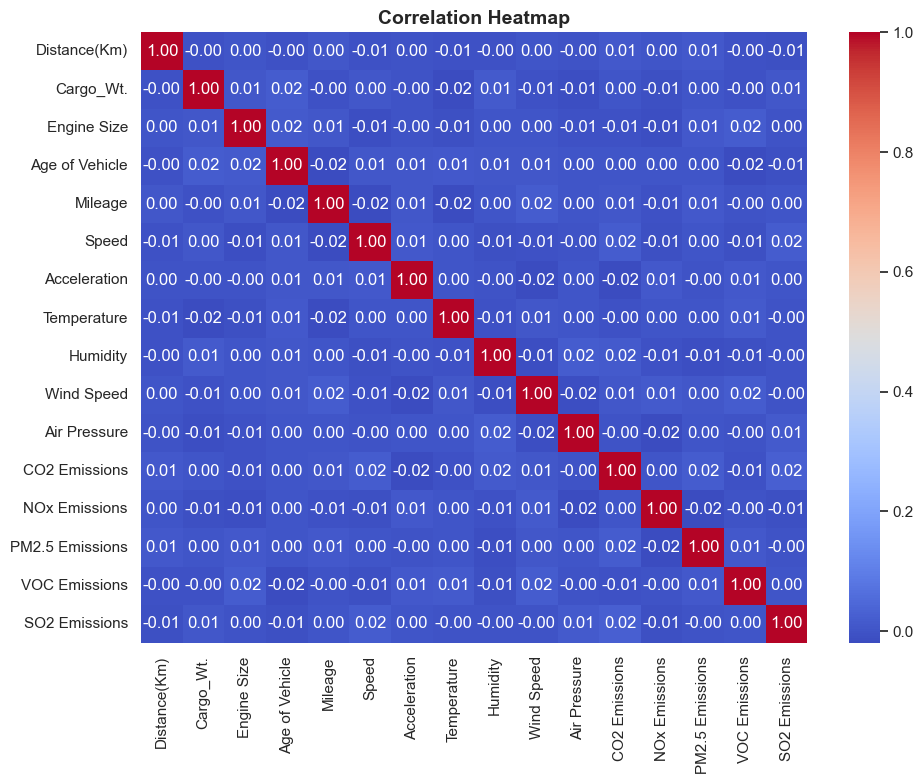

In [14]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=14, weight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()


Histograms for numeric columns

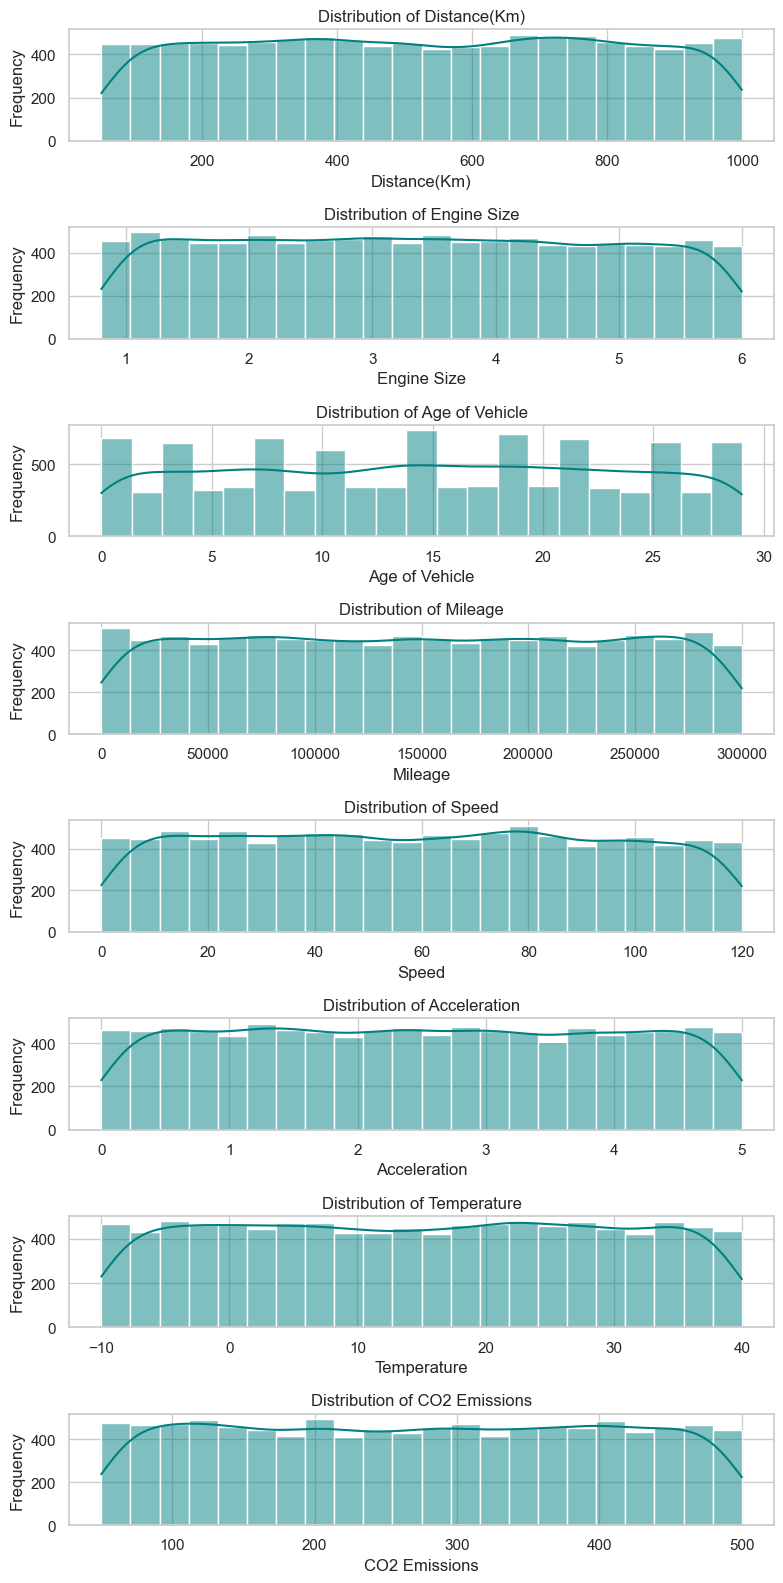

In [15]:
num_cols = ['Distance(Km)','Engine Size', 'Age of Vehicle', 'Mileage', 'Speed', 'Acceleration', 'Temperature', 'CO2 Emissions']
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(8, 2 * len(num_cols)))
for ax, col in zip(axes, num_cols):
    sns.histplot(df[col], kde=True, ax=ax, color='teal')
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('histograms_numeric_features.png')
plt.show()

Box plots for categorical vs CO2 emissions

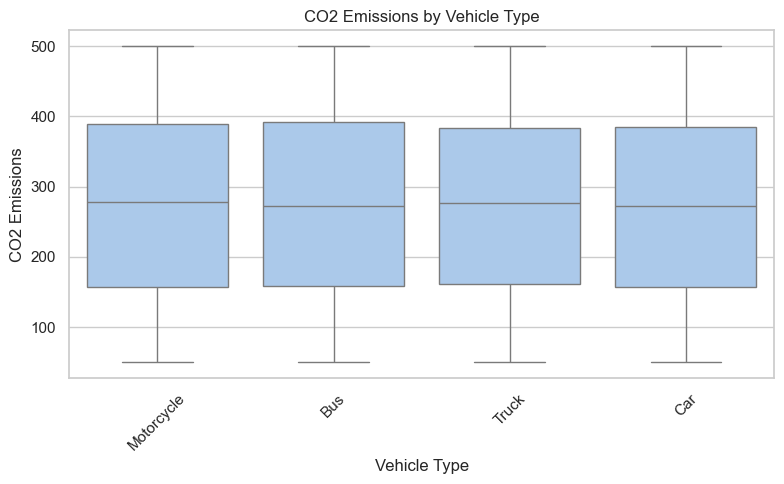

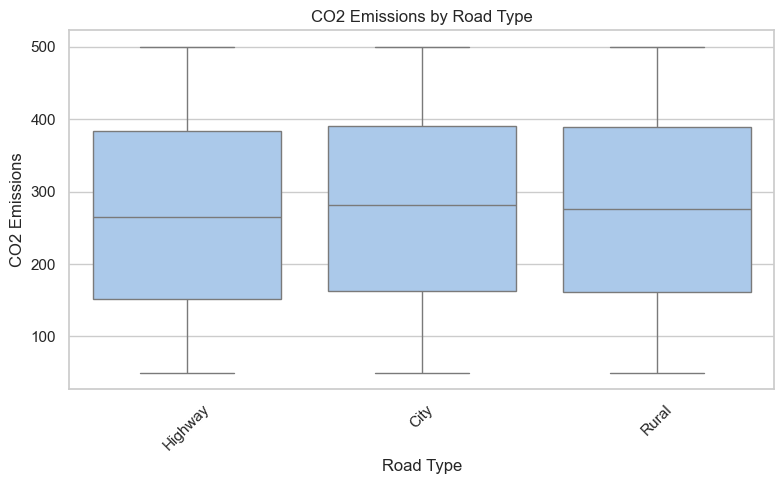

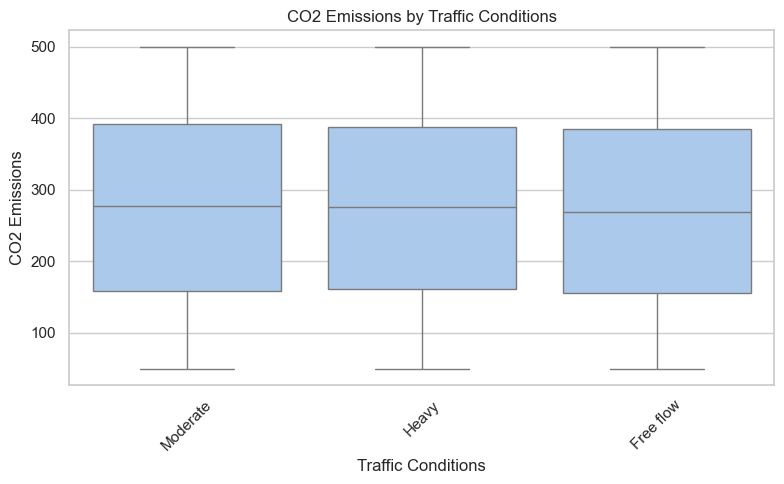

In [16]:
cat_features = ['Vehicle Type', 'Road Type', 'Traffic Conditions']
for feature in cat_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=feature, y='CO2 Emissions', data=df)
    plt.title(f'CO2 Emissions by {feature}', fontsize=12)
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel('CO2 Emissions')
    plt.tight_layout()
    plt.savefig(f'boxplot_{feature}.png')
    plt.show()

Scatter plots for key numeric features

C:\Users\AI\AppData\Local\Temp\ipykernel_3444\15582887.py:12: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\AI\AppData\Local\Temp\ipykernel_3444\15582887.py:14: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.savefig(f'scatter_{feature}.png')
C:\Users\AI\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


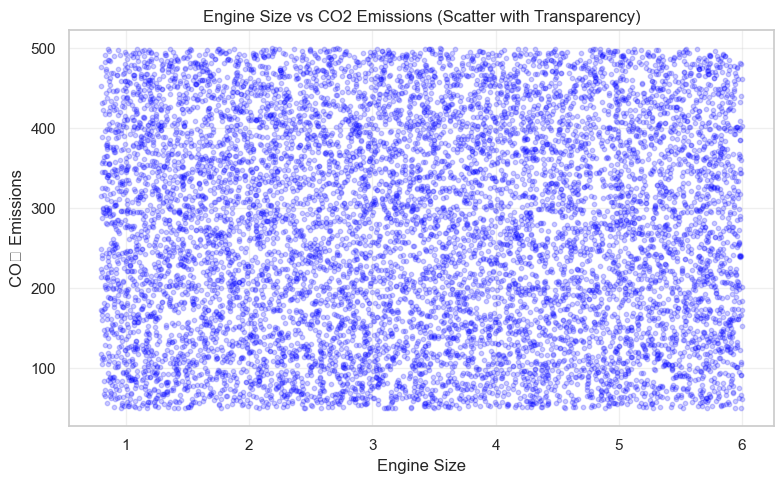

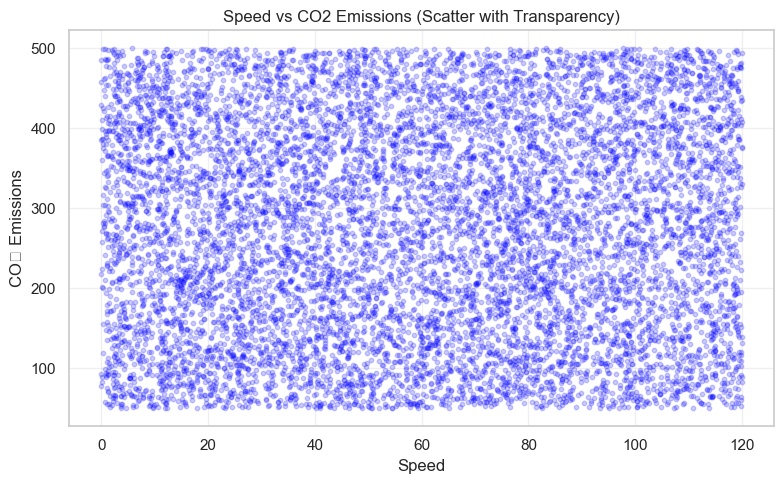

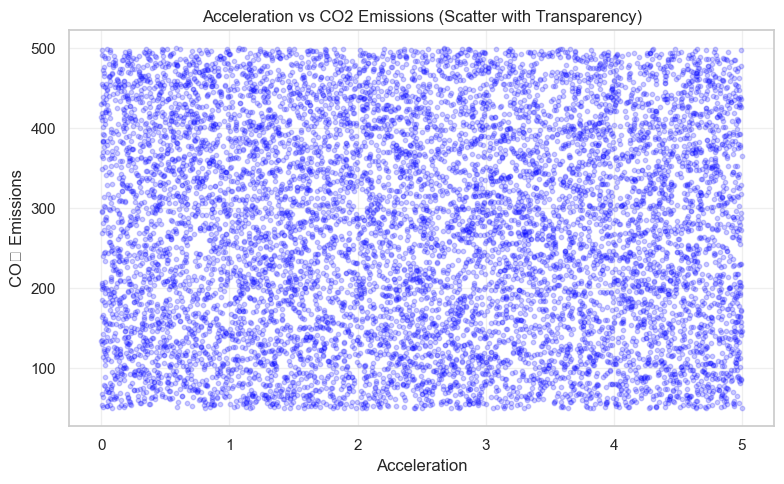

In [17]:
# List of features to plot
scatter_features = ['Engine Size', 'Speed', 'Acceleration']

# Loop through each feature and create the scatter plot
for feature in scatter_features:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[feature], df['CO2 Emissions'], alpha=0.2, s=10, color='blue')
    plt.xlabel(feature)
    plt.ylabel('CO₂ Emissions')
    plt.title(f'{feature} vs CO2 Emissions (Scatter with Transparency)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    # Save the figure
    plt.savefig(f'scatter_{feature}.png')
    plt.show()

Pair Plots for Key Features


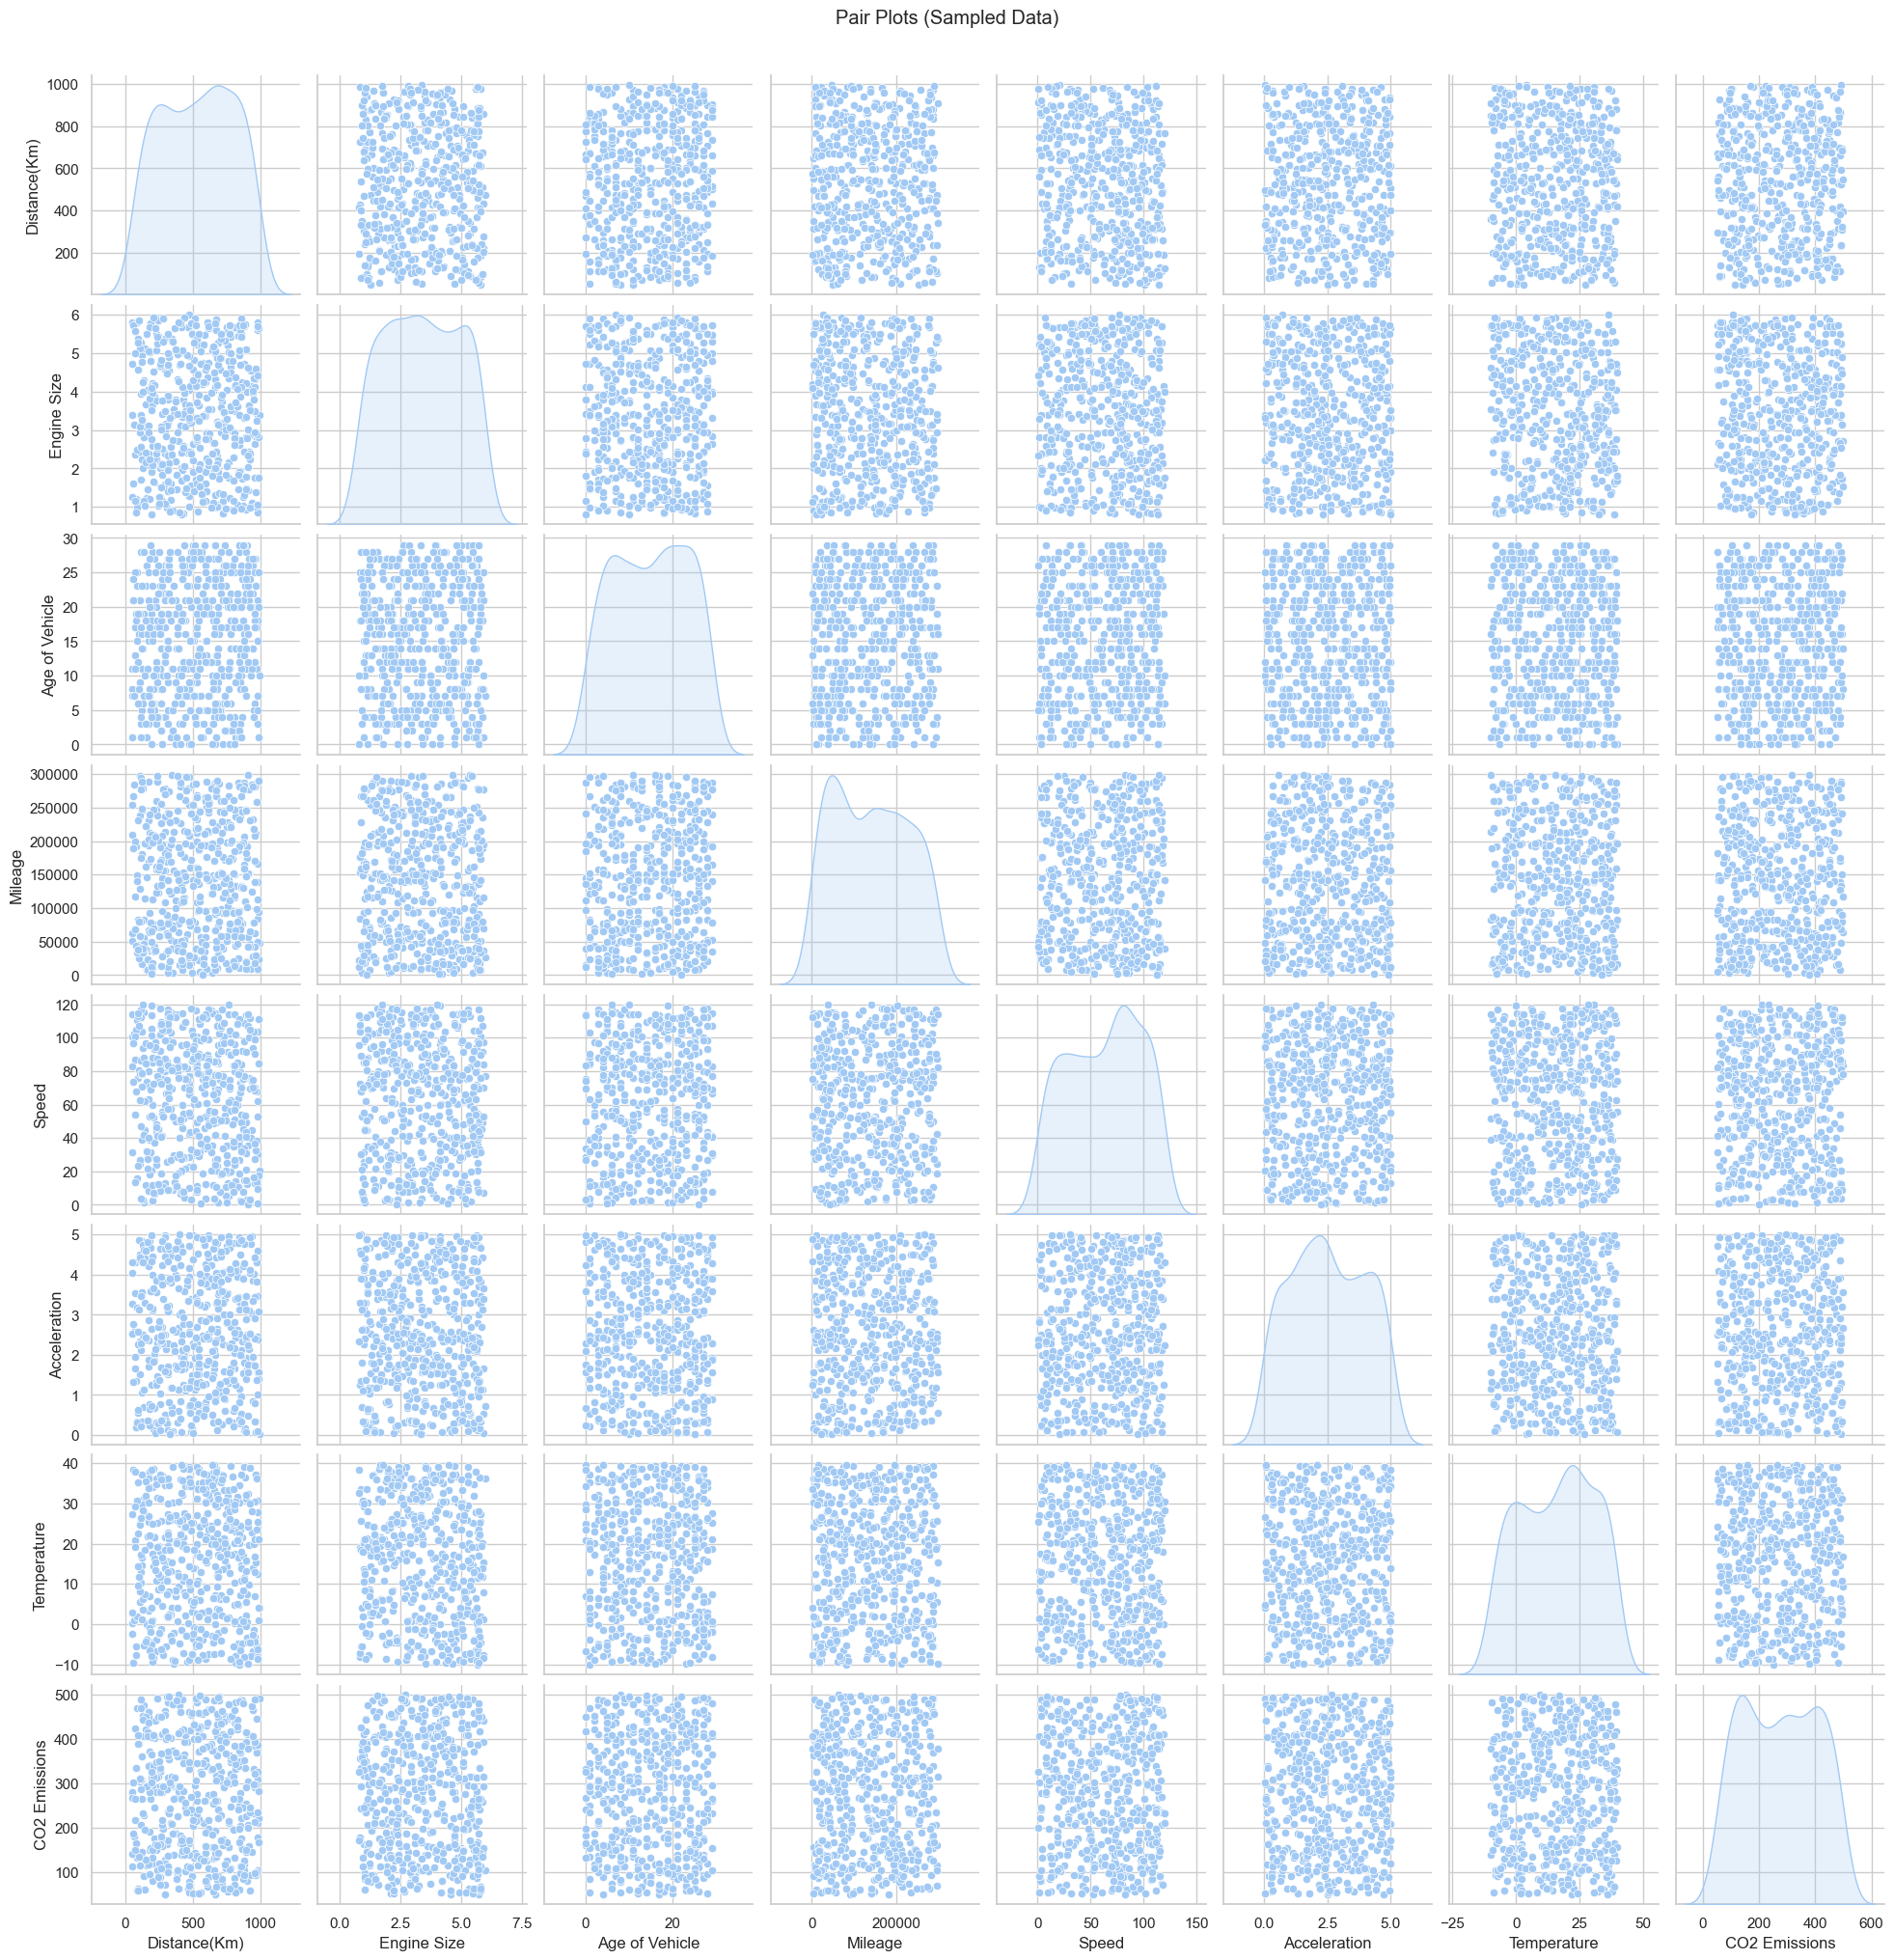

In [18]:
# Create pairwise scatter plots for selected important columns
sample_df = df.sample(n=500, random_state=42)  # take 500 random samples
sns.pairplot(
    sample_df[['Distance(Km)','Engine Size', 'Age of Vehicle', 'Mileage', 'Speed', 'Acceleration', 'Temperature', 'CO2 Emissions']],
    diag_kind='kde'
)
plt.suptitle('Pair Plots (Sampled Data)', y=1.02)
plt.show()

C:\Users\AI\AppData\Local\Temp\ipykernel_3444\1738605691.py:9: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\AI\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


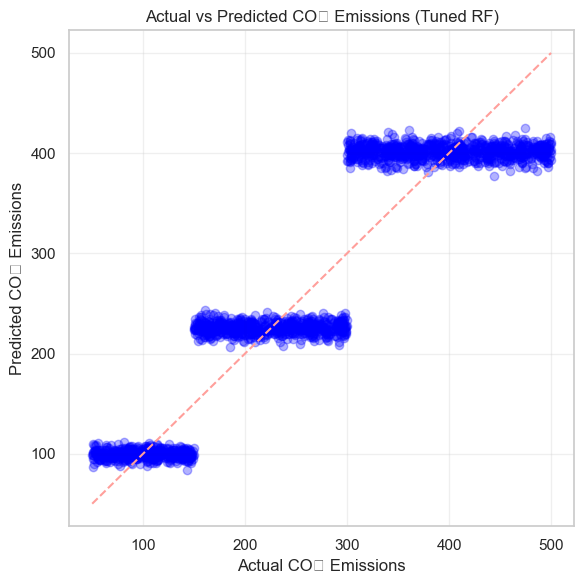

C:\Users\AI\AppData\Local\Temp\ipykernel_3444\1738605691.py:21: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()


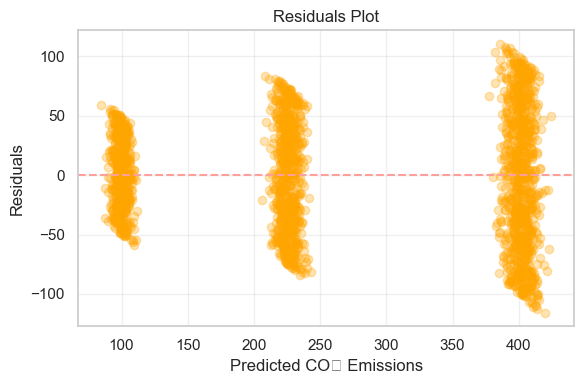

In [19]:
# Plot Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual CO₂ Emissions')
plt.ylabel('Predicted CO₂ Emissions')
plt.title('Actual vs Predicted CO₂ Emissions (Tuned RF)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.3, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted CO₂ Emissions')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [20]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

gb_mae = mean_absolute_error(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(y_test, gb_pred)

print("\nGradient Boosting Results:")
print(f"MAE: {gb_mae:.2f}, MSE: {gb_mse:.2f}, RMSE: {gb_rmse:.2f}, R²: {gb_r2:.2f}")



Gradient Boosting Results:
MAE: 41.95, MSE: 2539.14, RMSE: 50.39, R²: 0.85


Dataset Loaded: (10000, 21)
Saved label_encoders.pkl

Model Performance Metrics:
Mean Absolute Error: 40.92
Mean Squared Error: 2382.33
Root Mean Squared Error: 48.81
R2 Score: 0.859
Saved model.pkl
Saved feature_order.pkl
Saved feature_importance.png


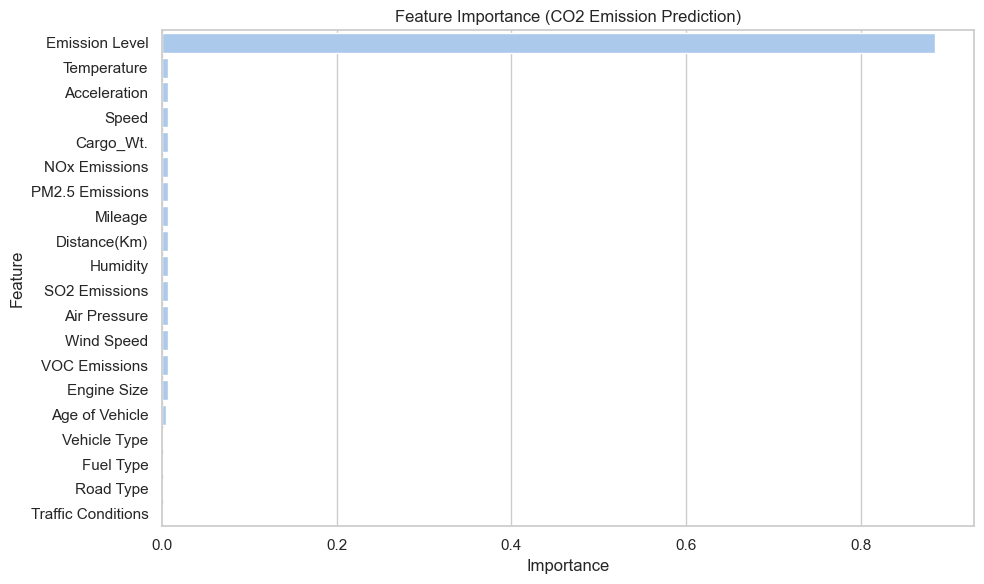

In [21]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
df = pd.read_csv('vehicle_emission_datasets2.csv')
print("Dataset Loaded:", df.shape)

# Ensure 'Distance(Km)' is in the dataset
if 'Distance(Km)' not in df.columns:
    raise ValueError("Distance(Km) column is missing in the dataset!")

# Check for missing values
df.dropna(subset=['CO2 Emissions', 'Distance(Km)'], inplace=True)

# Define target and features
target = 'CO2 Emissions'
X = df.drop(columns=[target])
y = df[target]

# Encode categorical columns
cat_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Save label encoders
joblib.dump(label_encoders, 'label_encoders.pkl')
print("Saved label_encoders.pkl")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train model
model = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance Metrics:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Score: {r2:.3f}")

# Save model and feature order
joblib.dump(model, 'model.pkl')
print("Saved model.pkl")

feature_order = X_train.columns.tolist()
joblib.dump(feature_order, 'feature_order.pkl')
print("Saved feature_order.pkl")

# OPTIONAL: Visualize Feature Importance
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance (CO2 Emission Prediction)")
plt.tight_layout()
plt.savefig("feature_importance.png")
print("Saved feature_importance.png")

